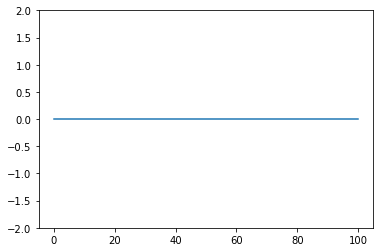

<Figure size 432x288 with 0 Axes>

In [5]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

# Parámetros
L = 1.0     # Longitud del dominio
T = 1.2     # Tiempo total
c = 1.0     # Velocidad de la onda
dx = 0.01   # Tamaño de paso espacial
dt = 0.01   # Tamaño de paso temporal


@nb.jit(nopython=True)
def solve_wave_equation_1d(L, T, c, dx, dt):
  # Calculando el número de puntos en el espacio y en el tiempo
  nx = int(L/dx) + 1
  nt = int(T/dt) + 1
  # Inicialización de la matriz u
  u = np.zeros((nt, nx))

  # Condiciones iniciales
  x = np.linspace(0, L, nx)
  u[0] = np.sin(2 * np.pi * x)
  # Iteración temporal
  for t in range(1, nt):
      for i in range(1, nx-1):
          u[t, i] = u[t-1, i] - c*dt/dx * (u[t-1, i] - u[t-1, i-1])

  return u

def simulation(T, dt,u):
    nt = int(T / dt) + 1
    for t in range(1, nt):           
        clear_output(wait=True)
        plt.plot(u[t, :])
        plt.ylim([-2,2])
        plt.show()
        plt.draw()
        plt.show()

    return 

U=solve_wave_equation_1d(L, T, c, dx, dt)
simulation(T, dt,U)


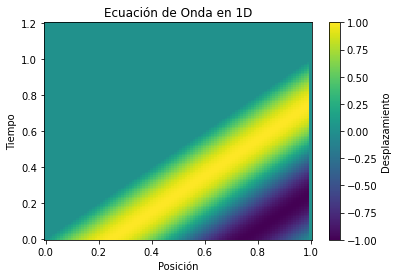

In [2]:
# Graficar la solución
x = np.linspace(0, L, U.shape[1])
t = np.linspace(0, T, U.shape[0])

plt.figure()
plt.pcolormesh(x, t, U, cmap='viridis')
plt.colorbar(label='Desplazamiento')
plt.xlabel('Posición')
plt.ylabel('Tiempo')
plt.title('Ecuación de Onda en 1D')
plt.show()

In [4]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

# Parámetros del problema
L = 1           # Longitud del dominio
T = 1           # Tiempo final
c = 1           # Velocidad de la onda
dx = 0.01       # Tamaño del paso espacial
dt = 0.001      # Tamaño del paso temporal

# Cálculo de parámetros adicionales
nx = int(L/dx) + 1  # Número de puntos espaciales
nt = int(T/dt) + 1  # Número de puntos temporales
r = c*dt/dx        # Número de Courant

# Inicialización de la matriz solución
u = np.zeros((nt, nx))

# Condiciones iniciales
u[0, :] = np.sin(np.pi*np.linspace(0, L, nx))

# Bucle de tiempo y espacio
for t in range(1, nt):
    for x in range(1, nx-1):
        # Esquema de diferencias finitas de la ecuación de onda
        u[t, x] = 2*(1-r**2)*u[t-1, x] - u[t-2, x] + r**2*(u[t-1, x+1] + u[t-1, x-1])

# Gráfico de la solución en diferentes instantes de tiempo
for t in range(nt):
    clear_output(wait=True)
    plt.plot(np.linspace(0, L, nx), u[t, :])
    plt.show()



KeyboardInterrupt: 